<a href="https://colab.research.google.com/github/AlekseySemenov1/MLCourse/blob/main/MLCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics
from google.colab import drive
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz
import cv2
import re

# "Метод главных компонент(2)"


## Часть 1

In [ ]:
path = "MGK.csv"
data = pd.read_csv(path, header=None)

36.233437405161986
5.10043678760478
0.6948305930196967
3


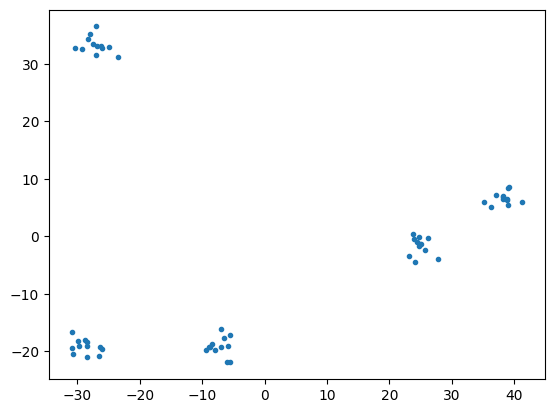

In [ ]:
Pca = PCA(svd_solver="full")
Pca.fit(data)
data = Pca.transform(data)
answer4 = 0
for i in np.cumsum(Pca.explained_variance_ratio_): # Для задания №3
  answer4 += 1
  if i > 0.85: # 0.85 - Пороговое значение дисперсии из задания
    break
print(data[0][0]) #1
print(data[0][1]) #2
print(np.cumsum(Pca.explained_variance_ratio_)[1]) #3
print(answer4) #4
plt.plot(data[:60, 0], data[:60, 1], '.')
plt.show() #5

## Часть 2

In [ ]:
data1 = pd.read_csv('/content/X_reduced_417.csv', delimiter=';')
data2 = pd.read_csv('/content/X_loadings_417.csv', delimiter=';')

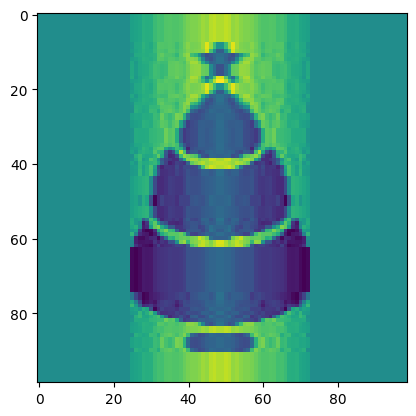

In [ ]:
dots = np.dot(data1, data2.T)
plt.imshow(dots)

# "Линейная регрессия(3)"

## Часть 1

In [ ]:
path = "LinearRegression1.csv"
data = pd.read_csv(path, header=None)

In [ ]:
print(data[1].mean()) #1
print(data[2].mean()) #2
reg = LinearRegression()
reg.fit(pd.DataFrame(data[1]), data[2])
print(reg.coef_[0]) #3
print(reg.intercept_) #4
print(reg.score(pd.DataFrame(data[1]), data[2])) #5

11.0
22.0
1.8865546218487392
1.24789915966387
0.9443289021294136


## Часть 2

In [ ]:
path = "LinearRegression2.csv"
data = pd.read_csv(path, header=0, index_col=0)
exclude_candies = ['Milky Way', 'Mr Good Bar'] # Названия конфет из задания, которые нужно исключить 
candy = [0, 1, 0, 1, 0, 1, 1, 0, 0, 0.93, 0.635] # Параметры из задания 3

In [ ]:
reg = LinearRegression()
x_train = data.drop(index=exclude_candies)
y_train = x_train['winpercent']
x_train = x_train.drop(columns=['winpercent', 'Y'])
x_test = data.loc[exclude_candies].drop(columns=['winpercent', 'Y'])
reg.fit(x_train, y_train)
print(reg.predict(x_test)) #1,2
print(reg.predict(pd.DataFrame(candy).transpose())) #3

# "Метод k-ближайших соседей(4)"

In [ ]:
path = 'KNeighbors.csv'
data = pd.read_csv(path, header=None, index_col=0)

In [ ]:
x_train = data.drop(columns=3)
y_train = data[3]
x_test = [17,94]
KN = KNeighborsClassifier(p=2)
KN.fit(x_train, y_train)
print(KN.kneighbors(pd.DataFrame(x_test).transpose())[0][0][0]) #1
print(KN.kneighbors(pd.DataFrame(x_test).transpose())[1][0][:3]+1) #2

KN = KNeighborsClassifier(p=2, n_neighbors=3)
KN.fit(x_train, y_train)
print(KN.predict(pd.DataFrame(x_test).transpose())) #3
KN = KNeighborsClassifier(p=1)

KN.fit(x_train, y_train)
print(KN.kneighbors(pd.DataFrame(x_test).transpose())[0][0][0]) #4
print(KN.kneighbors(pd.DataFrame(x_test).transpose())[1][0][:3]+1) #5
print(KN.predict(pd.DataFrame(x_test).transpose())) #6

11.180339887498949
[10  9  1]
[1]
13.0
[10  9  1]
[1]


# "Логистическая регрессия(6)"

In [ ]:
path_train = 'LogisticRegressionTrain.csv'
path_test = 'LogisticRegressionTest.csv'
data_train = pd.read_csv(path_train, header=0, index_col=0)
data_test = pd.read_csv(path_test, header=0, index_col=0)
exclude_candies = ['Dots', 'Fun Dip', 'Milky Way Midnight'] # Названия конфет из задания, которые нужно исключить
task_candies = ['Twix', 'Tootsie Roll Juniors'] # Названия конфет из заданий 1,2

In [ ]:
x_train = data_train.drop(index=exclude_candies, columns=['winpercent', 'Y'])
y_train = data_train['Y'].drop(index=exclude_candies)
x_test = data_test.drop(columns=['Y'])
y_test = list(data_test['Y'])
reg = LogisticRegression(random_state = 2019, solver = 'lbfgs')
reg.fit(x_train, y_train)
y_predict = reg.predict(x_test)
y_predict_proba = reg.predict_proba(x_test)[:,1]
print(reg.predict_proba(x_test.loc[task_candies])[0][1]) #1
print(reg.predict_proba(x_test.loc[task_candies])[1][1]) #2
recall = metrics.recall_score(y_test, y_predict)
precision = metrics.precision_score(y_test, y_predict)
print(recall) #3
print(precision) #4
print(metrics.roc_auc_score(y_test, y_predict_proba)) #5

0.44192209226677653
0.6822300532431902
0.6
0.5
0.8799999999999999


# "Метод опорных векторов(7)"

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
imagePaths = sorted(list(paths.list_images('drive/MyDrive/train_task/train')))

In [ ]:
SVC = LinearSVC(C=0.72, random_state=5)
train, test = train_test_split(imagePaths, test_size = 0.25, random_state=5)
x_train = []
y_train = []
x_test = []
y_test = []
d = {'cat': 0, 'dog': 1}
for i in train:
  y_train.append(re.search(r'[A-Za-z]+', re.search(r'/[A-Za-z]+\.', i)[0])[0])
for _, image in enumerate(train):
  x_train.append(extract_histogram(cv2.imread(image)))
for _, image in enumerate(test):
  x_test.append(extract_histogram(cv2.imread(image)))
for i in test:
  y_test.append(re.search(r'[A-Za-z]+', re.search(r'/[A-Za-z]+\.', i)[0])[0])

y_train = [d[i] for i in y_train]
y_test = [d[i] for i in y_test]

In [ ]:
SVC.fit(x_train, y_train)
y_predict = SVC.predict(x_test)
print(SVC.coef_[0][448]) #1
print(SVC.coef_[0][241]) #2
print(SVC.coef_[0][75]) #3
print(metrics.f1_score(y_predict, y_test, average='macro')) #4

0.0
0.0001480269120407369
0.3616986770050227
0.5528448734269003


In [ ]:
x = [extract_histogram(cv2.imread('drive/MyDrive/test_task/test/cat.1046.jpg')), 
     extract_histogram(cv2.imread('drive/MyDrive/test_task/test/dog.1016.jpg')),
     extract_histogram(cv2.imread('drive/MyDrive/test_task/test/cat.1028.jpg')),
     extract_histogram(cv2.imread('drive/MyDrive/test_task/test/cat.1032.jpg'))]
print(SVC.predict(x)) #5,6,7,8; 0 - cat, 1 - dog

[1 0 0 0]


# "Деревья принятия решений(8)"

In [ ]:
path = 'dec_tree.csv'
data1 = pd.read_csv(path)

In [ ]:
data = data1[:670]
x_train = data[:int(670*0.8)].drop(columns='Outcome')
y_train = data[:int(670*0.8)]['Outcome']
x_test = data[int(670*0.8):].drop(columns='Outcome')
y_test = data[int(670*0.8):]['Outcome']
dec_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, min_samples_leaf=10, random_state=2020)
dec_tree.fit(x_train, y_train)
y_predict = dec_tree.predict(x_test)
print(len(data[data['Outcome'] == 0])) #1
print(dec_tree.get_depth()) #2
print(dec_tree.score(x_test, y_test)) #4
print(metrics.f1_score(y_predict, y_test, average='macro')) #5
y_predict1 = dec_tree.predict(data1.drop(columns='Outcome')) #6
print(y_predict1[[712, 749, 703, 740]]) #7,8,9,10

439
6
0.8208955223880597
0.775982167734745
[0 1 0 1]


In [ ]:
columns = list(x_train.columns)
graphviz.Source(export_graphviz(dec_tree, 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')) #Визаулизация дерева для задания №3

# "Метод k-средних(9)"

In [ ]:
path = "KMeans.csv"
data = pd.read_csv(path, header=None, index_col=0)

In [ ]:
Kmeans = KMeans(n_clusters=3, init=np.array([[11.6, 12.4], [12.13, 9.13], [1.5, 18.0]]), max_iter=100, n_init=1)
x_data = data.drop(columns=3)
y_data = data.drop(columns=[1,2])

Kmeans.fit(x_data)
y_predict = Kmeans.predict(x_data)
distance = Kmeans.transform(x_data)
answer = []
for pos, i in enumerate(y_predict):
  if i == 0:
     answer.append(distance[pos][0])
print(y_predict) #1
print(np.array(answer).mean()) #2

[0 0 2 0 2 2 2 0 1 1 0 1 1 2 0]
3.5940895699167448


# "Ансамблевые методы(10)"

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
imagePaths = sorted(list(paths.list_images('drive/MyDrive/train/train')))
x_train = []
y_train = []
d = {'cat': 1, 'dog': 0}
for i in imagePaths:
  y_train.append(re.search(r'[A-Za-z]+', re.search(r'/[A-Za-z]+\.', i)[0])[0])
for _, image in enumerate(imagePaths):
  x_train.append(extract_histogram(cv2.imread(image)))
y_train = [d[i] for i in y_train]

In [ ]:
svm = LinearSVC(C=1.75, random_state=195)
dec_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=195)
bag_class = BaggingClassifier(dec_tree, n_estimators=12, random_state=195)
forest = RandomForestClassifier(n_estimators=12, criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=195)
log_reg = LogisticRegression(solver='lbfgs', random_state=195)
estimators = [('SVM', svm), ('Bagging Dec_tree', bag_class), ('RandForest', forest)]
stack_class = StackingClassifier(estimators=estimators, final_estimator=log_reg, cv=2)
stack_class.fit(x_train, y_train)

In [ ]:
print(stack_class.score(x_train, y_train)) #1

0.83


In [ ]:
x = [extract_histogram(cv2.imread('drive/MyDrive/test/test/dog.1032.jpg')), 
     extract_histogram(cv2.imread('drive/MyDrive/test/test/cat.1048.jpg')),
     extract_histogram(cv2.imread('drive/MyDrive/test/test/dog.1024.jpg')),
     extract_histogram(cv2.imread('drive/MyDrive/test/test/cat.1016.jpg'))]
print(stack_class.predict_proba(x)[:len(x), 1]) #2,3,4,5; 0 - dog, 1 - cat

[0.67161825 0.38113495 0.52764413 0.74294274]
